In [1]:
import pandas as pd
import numpy as np

In [2]:
rows, columns = 2000, 2000
a = [list(range(i, i + columns)) for i in range(rows)]
b = [[0 for j in range(columns)] for i in range(rows)]

In [7]:
%%timeit
for i in range(rows):
    for j in range(columns):
        b[i][j] = 2*a[i][j]

481 ms ± 3.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
c = np.asarray(a)

In [8]:
%%timeit
c*2

6.11 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [2]:
df = pd.read_csv('Rome_weather_data.csv', index_col='DATE', low_memory=False)

In [3]:
df.nunique()

STATION              3
NAME                 3
LATITUDE             3
LONGITUDE            3
ELEVATION            3
PRCP               450
PRCP_ATTRIBUTES      8
SNWD                13
SNWD_ATTRIBUTES      1
TAVG               343
TAVG_ATTRIBUTES      1
TMAX               403
TMAX_ATTRIBUTES      7
TMIN               321
TMIN_ATTRIBUTES      9
dtype: int64

In [4]:
df.sort_index(inplace=True)

In [5]:
df.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,,,
2022-08-18,IT000162240,"VIGNA DI VALLE, IT",42.0828,12.2167,266.0,0.0,"B,,S",NaN,NaN,27.9,"H,,S",NaN,NaN,NaN,NaN
2022-08-18,IT000016239,"ROMA CIAMPINO, IT",41.7831,12.5831,105.0,0.0,"B,,S",NaN,NaN,29.8,"H,,S",35.6,",,S",24.3,",,S"
2022-08-19,IT000162240,"VIGNA DI VALLE, IT",42.0828,12.2167,266.0,4.1,"B,,S",NaN,NaN,23.9,"H,,S",NaN,NaN,21.0,",,S"
2022-08-19,ITM00016245,"PRATICA DI MARE, IT",41.6590,12.4450,12.5,NaN,NaN,NaN,NaN,26.3,"H,,S",28.4,",,S",NaN,NaN
2022-08-19,IT000016239,"ROMA CIAMPINO, IT",41.7831,12.5831,105.0,3.0,"B,,S",NaN,NaN,24.9,"H,,S",28.4,",,S",NaN,NaN


In [6]:
df = df.groupby(df.index).mean()

In [7]:
df.tail()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,
2022-08-15,41.841633,12.414933,127.833333,0.00,NaN,25.766667,30.633333,20.366667
2022-08-16,41.841633,12.414933,127.833333,0.50,NaN,26.666667,31.266667,21.666667
2022-08-17,41.841633,12.414933,127.833333,0.15,NaN,27.800000,33.500000,23.400000
2022-08-18,41.841633,12.414933,127.833333,0.00,NaN,29.066667,34.800000,24.300000
2022-08-19,41.841633,12.414933,127.833333,3.55,NaN,25.033333,28.400000,21.000000


In [8]:
df.isnull().sum()/df.shape[0]

LATITUDE     0.000000
LONGITUDE    0.000000
ELEVATION    0.000000
PRCP         0.007624
SNWD         0.998966
TAVG         0.181327
TMAX         0.004751
TMIN         0.026282
dtype: float64

In [9]:
core_df = df[['PRCP', 'SNWD', 'TMAX', 'TMIN']].copy()

In [10]:
core_df.columns = ['precip', 'snow_depth', 'temp_max', 'temp_min']

In [11]:
core_df.head()

,precip,snow_depth,temp_max,temp_min
DATE,,,,
1951-03-01,0.2,NaN,13.2,3.0
1951-03-02,0.0,NaN,10.5,2.0
1951-03-03,0.0,NaN,8.6,-1.4
1951-03-04,0.0,NaN,13.6,-2.0
1951-03-05,0.1,NaN,15.2,2.7


In [12]:
core_df.isnull().sum()/core_df.shape[0]

precip        0.007624
snow_depth    0.998966
temp_max      0.004751
temp_min      0.026282
dtype: float64

In [13]:
del core_df['snow_depth']

In [14]:
core_df.loc['1978-10-10':'1978-10-25',:]

,precip,temp_max,temp_min
DATE,,,
1978-10-10,9.6,22.25,12.10
1978-10-11,0.0,24.10,11.90
1978-10-12,0.0,25.20,12.50
1978-10-13,0.0,24.85,12.75
1978-10-14,NaN,23.70,12.40
1978-10-15,NaN,23.25,11.45
1978-10-16,0.0,21.85,11.10
1978-10-17,NaN,20.20,9.90
1978-10-18,NaN,20.40,12.60


In [15]:
core_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precip,25903.0,2.251032,6.821218,0.00,0.0,0.0,0.50,213.0
temp_max,25978.0,20.821832,20.607915,-2.15,14.1,19.6,26.50,999.0
temp_min,25416.0,11.679143,24.055091,-7.70,5.9,10.6,15.95,999.0


In [16]:
core_df.ffill(axis=0, inplace=True)

In [17]:
core_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precip,26102.0,2.250332,6.823393,0.00,0.0,0.0,0.500000,213.0
temp_max,26102.0,20.813576,20.564727,-2.15,14.1,19.6,26.466667,999.0
temp_min,26102.0,11.706327,24.527919,-7.70,5.9,10.6,15.933333,999.0


In [18]:
core_df.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [19]:
core_df.index = pd.to_datetime(core_df.index)

<AxesSubplot:xlabel='DATE'>

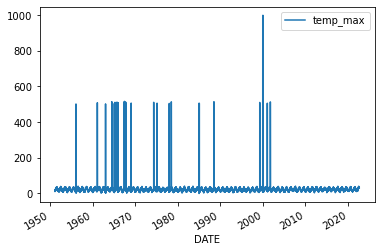

In [20]:
core_df[['temp_max']].plot()

In [21]:
core_df.apply(lambda x: (x==999).sum())

precip      0
temp_max    3
temp_min    5
dtype: int64

In [22]:
core_df[core_df['temp_max'] == 999] = np.nan
core_df[core_df['temp_min'] == 999] = np.nan

In [23]:
core_df

,precip,temp_max,temp_min
DATE,,,
1951-03-01,0.20,13.200000,3.000000
1951-03-02,0.00,10.500000,2.000000
1951-03-03,0.00,8.600000,-1.400000
1951-03-04,0.00,13.600000,-2.000000
1951-03-05,0.10,15.200000,2.700000
...,...,...,...
2022-08-15,0.00,30.633333,20.366667
2022-08-16,0.50,31.266667,21.666667
2022-08-17,0.15,33.500000,23.400000


In [24]:
core_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precip,26097.0,2.249399,6.820866,0.00,0.0,0.0,0.500000,213.0
temp_max,26097.0,20.701696,17.691038,-2.15,14.1,19.6,26.466667,515.2
temp_min,26097.0,11.517169,20.369983,-7.70,5.9,10.6,15.933333,508.7


In [25]:
def IQR_calc(column):
    Q1 = core_df[column].quantile(0.25)
    Q3 = core_df[column].quantile(0.75)
    return Q3 - Q1

In [26]:
IQR_temp_min = IQR_calc('temp_min')

lower_lim_min = core_df['temp_min'].quantile(0.25) - 5 * IQR_temp_min
upper_lim_min = core_df['temp_min'].quantile(0.75) + 5 * IQR_temp_min


IQR_temp_max = IQR_calc('temp_max')

lower_lim_max = core_df['temp_max'].quantile(0.25) - 5 *IQR_temp_max
upper_lim_max = core_df['temp_max'].quantile(0.75) + 5 *IQR_temp_max

In [27]:
#IQR_precip = IQR_calc('precip')

#lower_lim_precip = 0
#upper_lim_precip = 10

#print(lower_lim_precip, upper_lim_precip)

In [28]:
core_df.loc[core_df['temp_max'] > upper_lim_max, 'temp_max'] = np.nan
core_df.loc[core_df['temp_max'] < lower_lim_max, 'temp_max'] = np.nan
core_df.loc[core_df['temp_min'] > upper_lim_min, 'temp_min'] = np.nan
core_df.loc[core_df['temp_min'] < lower_lim_max, 'temp_min'] = np.nan
#core_df.loc[core_df['precip'] > upper_lim_precip, 'precip'] = np.nan
#core_df.loc[core_df['precip'] < lower_lim_precip, 'precip'] = np.nan


In [29]:
core_df['target'] = core_df.shift(-1)['temp_max']

In [30]:
core_df

,precip,temp_max,temp_min,target
DATE,,,,
1951-03-01,0.20,13.200000,3.000000,10.500000
1951-03-02,0.00,10.500000,2.000000,8.600000
1951-03-03,0.00,8.600000,-1.400000,13.600000
1951-03-04,0.00,13.600000,-2.000000,15.200000
1951-03-05,0.10,15.200000,2.700000,18.000000
...,...,...,...,...
2022-08-15,0.00,30.633333,20.366667,31.266667
2022-08-16,0.50,31.266667,21.666667,33.500000
2022-08-17,0.15,33.500000,23.400000,34.800000


In [31]:
core_df = core_df.iloc[:-1,:].copy()

In [32]:
core_df

,precip,temp_max,temp_min,target
DATE,,,,
1951-03-01,0.20,13.200000,3.000000,10.500000
1951-03-02,0.00,10.500000,2.000000,8.600000
1951-03-03,0.00,8.600000,-1.400000,13.600000
1951-03-04,0.00,13.600000,-2.000000,15.200000
1951-03-05,0.10,15.200000,2.700000,18.000000
...,...,...,...,...
2022-08-14,0.00,31.450000,17.800000,30.633333
2022-08-15,0.00,30.633333,20.366667,31.266667
2022-08-16,0.50,31.266667,21.666667,33.500000


In [33]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)

In [34]:
predictors = ['precip', 'temp_max', 'temp_min']

In [35]:
train = core_df.loc[:'2020-12-31']
test = core_df.loc['2021-01-01':]
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,6.40,11.750000,4.133333,13.000000
2021-01-02,27.95,13.000000,4.133333,13.000000
2021-01-03,29.95,13.000000,4.133333,11.266667
2021-01-04,11.05,11.266667,3.800000,9.400000
2021-01-05,27.60,9.400000,7.000000,10.700000
...,...,...,...,...
2022-08-14,0.00,31.450000,17.800000,30.633333
2022-08-15,0.00,30.633333,20.366667,31.266667
2022-08-16,0.50,31.266667,21.666667,33.500000


In [36]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1951-03-01,0.20,13.200000,3.000000,10.500000
1951-03-02,0.00,10.500000,2.000000,8.600000
1951-03-03,0.00,8.600000,-1.400000,13.600000
1951-03-04,0.00,13.600000,-2.000000,15.200000
1951-03-05,0.10,15.200000,2.700000,18.000000
...,...,...,...,...
2020-12-27,0.50,10.266667,3.000000,13.800000
2020-12-28,11.90,13.800000,3.433333,14.500000
2020-12-29,2.65,14.500000,3.433333,11.833333


In [37]:
reg.fit(train[predictors], train['target'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test['target'], predictions)

In [ ]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'prediction']

In [ ]:
combined.plot()

In [ ]:
reg.coef_

In [ ]:
def create_predictions(predictors, core_df, reg):
    train = core_df.loc[:'2020-12-31']
    test = core_df.loc['2021-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    return error, combined

In [ ]:
core_df['month_max'] = core_df['temp_max'].rolling(30).mean()

In [ ]:
core_df.tail()

In [ ]:
core_df['month_day_max'] = core_df['month_max'] - core_df['temp_max']

In [ ]:
core_df['max_min'] = core_df['temp_max'] - core_df['temp_min']

In [ ]:
core_df

In [ ]:
core_df = core_df.iloc[30:,:].copy()

In [ ]:
max(core_df['month_day_max'])

In [ ]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [ ]:
error, combined = create_predictions(predictors, core_df, reg)

In [ ]:
error

In [ ]:
combined.plot()

In [ ]:
core_df['monthly_avg'] = core_df['temp_max'].groupby(core_df.index.month).apply(lambda x: x.expanding(1).mean())

In [ ]:
core_df['day_of_year_avg'] = core_df['temp_max'].groupby(core_df.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [ ]:
core_df

In [ ]:
predictors

In [ ]:
predictors = predictors + ['monthly_avg', 'day_of_year_avg']

In [ ]:
predictors

In [ ]:
error, combined = create_predictions(predictors, core_df, reg)

In [ ]:
error

In [ ]:
reg.coef_

In [ ]:
core_df.corr()['target']

In [ ]:
combined['diff'] = (combined['actual'] - combined['predictions'].abs())

In [ ]:
combined.sort_values('diff', ascending=False).head()

In [ ]:
combined.plot()